In [1]:
# Library import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [2]:
#Dataset 불러오기
df = pd.read_csv('happydata.csv')

In [3]:
#Data 확인
print(df.head())
print(df.shape)
print(df.info())

   infoavail  housecost  schoolquality  policetrust  streetquality  ëvents  \
0          3          3              3            4              2       4   
1          3          2              3            5              4       3   
2          5          3              3            3              3       5   
3          5          4              3            3              3       5   
4          5          4              3            3              3       5   

   happy  
0      0  
1      0  
2      1  
3      0  
4      0  
(143, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   infoavail      143 non-null    int64
 1   housecost      143 non-null    int64
 2   schoolquality  143 non-null    int64
 3   policetrust    143 non-null    int64
 4   streetquality  143 non-null    int64
 5   ëvents         143 non-null    int64
 6   happy      

In [4]:
df.describe()

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents,happy
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,4.314685,2.538462,3.265734,3.699301,3.615385,4.216783,0.538462
std,0.799820,1.118155,0.992586,0.888383,1.131639,0.848693,0.500271
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000,0.000000
50%,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000,1.000000
75%,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


In [5]:
# CHECKING FOR NULL VALUES
df.isnull().sum()

infoavail        0
housecost        0
schoolquality    0
policetrust      0
streetquality    0
ëvents           0
happy            0
dtype: int64

In [6]:
df.duplicated().sum()

18

In [7]:
df.drop_duplicates()

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents,happy
0,3,3,3,4,2,4,0
1,3,2,3,5,4,3,0
2,5,3,3,3,3,5,1
3,5,4,3,3,3,5,0
5,5,5,3,5,5,5,1
...,...,...,...,...,...,...,...
137,5,2,3,4,4,3,1
138,5,3,3,1,3,5,0
139,5,2,3,4,2,5,1
141,4,3,3,4,4,5,0


<AxesSubplot:xlabel='happy'>

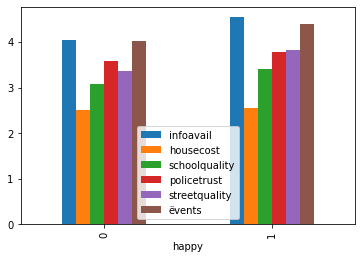

In [8]:
df.groupby('happy').mean().plot(kind='bar')

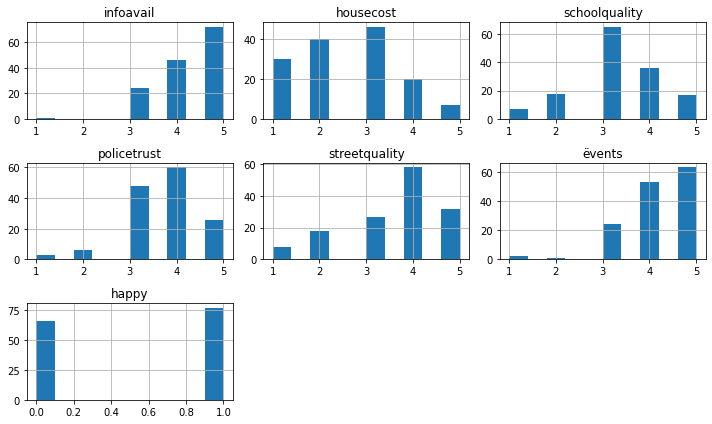

In [9]:
# Create histograms for each variable
df.hist(figsize=(10, 6))
plt.tight_layout()
plt.show()

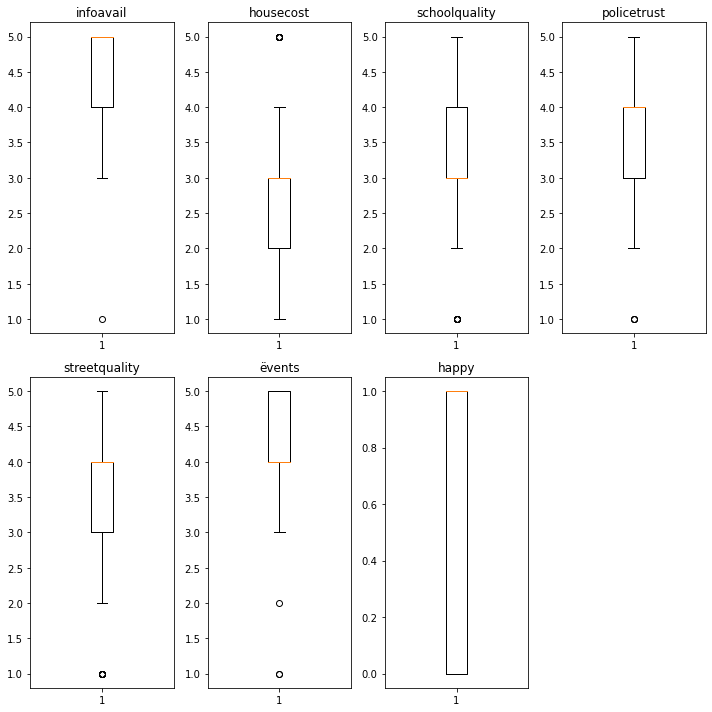

In [10]:
# Creating subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 10))
# Flatten the axes array to iterate over subplots
axes = axes.flatten()

categorical_cols = df.columns[df.dtypes == object]
numberic_cols = [x for x in df.columns if x not in categorical_cols]
# Plot boxplots for each column
for i, column in enumerate(numberic_cols):
    axes[i].boxplot(df[column])
    axes[i].set_title(column)

# Hide any unused subplots
for j in range(len(numberic_cols), len(axes)):
    axes[j].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

### Train Test Split 나누기

In [11]:
train_points = df.drop("happy", axis=1)
train_labels = df["happy"]

# standardize the dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_points_scaled = scaler.fit_transform(train_points)

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(train_points_scaled, train_labels, 
                                                    test_size=0.2, random_state=5)

### DecisionTree 

In [12]:
#Import Decision Tree
from sklearn.tree import DecisionTreeClassifier

#Create a Gaussian Classifier
classifier = DecisionTreeClassifier(random_state=0)

#Train the model using the training sets
classifier.fit(X_train,y_train)

guesses = classifier.predict(X_test)

In [13]:
guesses

array([1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0], dtype=int64)

### DecisionTree 첫 ACcuracy 

In [14]:
#Import scikit-learn metrics module for checking confusion matrix and accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Confusion matrix
print("Confusion Matrix: ", confusion_matrix(y_test, guesses))

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, guesses))


Confusion Matrix:  [[7 7]
 [9 6]]
Accuracy: 0.4482758620689655


###  Random Forest

In [15]:
#Import Random Forest
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
classifier = RandomForestClassifier(random_state=0, n_estimators=3)

#Train the model using the training sets y_pred=clf.predict(X_test)
classifier.fit(X_train,y_train)

guesses = classifier.predict(X_test)

### Random Forest 첫 정확도

In [16]:
# Confusion matrix
print("Confusion Matrix: ", confusion_matrix(y_test, guesses))

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, guesses))

Confusion Matrix:  [[ 9  5]
 [ 4 11]]
Accuracy: 0.6896551724137931


In [19]:
#Import Random Forest
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
classifier = RandomForestClassifier(random_state=0, n_estimators=10)

#Train the model using the training sets y_pred=clf.predict(X_test)
classifier.fit(X_train,y_train)

guesses = classifier.predict(X_test)

print("Confusion Matrix: ", confusion_matrix(y_test, guesses))

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, guesses))

Confusion Matrix:  [[11  3]
 [ 5 10]]
Accuracy: 0.7241379310344828


### Random Forest 정확도 향상시키기

[0.5862068965517241, 0.6896551724137931, 0.6896551724137931, 0.7241379310344828, 0.5862068965517241, 0.6206896551724138, 0.5862068965517241, 0.7241379310344828, 0.6551724137931034, 0.7241379310344828, 0.6896551724137931, 0.6896551724137931, 0.6551724137931034, 0.6896551724137931, 0.6896551724137931, 0.6551724137931034, 0.6551724137931034, 0.6551724137931034, 0.6551724137931034, 0.6206896551724138, 0.6551724137931034, 0.6551724137931034, 0.6551724137931034, 0.6551724137931034, 0.6551724137931034, 0.6206896551724138, 0.6206896551724138, 0.6206896551724138, 0.6551724137931034, 0.6206896551724138, 0.6551724137931034, 0.6551724137931034, 0.6206896551724138, 0.6551724137931034, 0.6551724137931034, 0.6206896551724138, 0.6206896551724138, 0.6206896551724138, 0.6206896551724138, 0.6206896551724138, 0.6206896551724138, 0.6206896551724138, 0.6206896551724138, 0.6206896551724138, 0.6206896551724138, 0.5862068965517241, 0.5862068965517241, 0.5862068965517241, 0.5862068965517241, 0.5862068965517241,

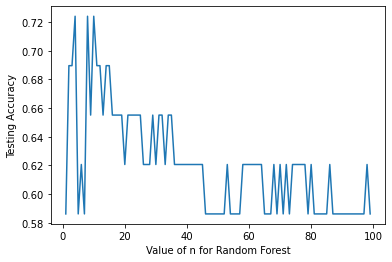

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

n_range = range(1, 100)
accuracy_scores = []

for n in n_range:
    classifier = RandomForestClassifier(random_state=0, n_estimators=n)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, guesses))
print(accuracy_scores)

import matplotlib.pyplot as plt

plt.plot(n_range, accuracy_scores)
plt.xlabel('Value of n for Random Forest')
plt.ylabel('Testing Accuracy')
plt.show()


### AdaBoost 정확도

[0.7586206896551724, 0.6551724137931034, 0.6896551724137931, 0.6896551724137931, 0.6896551724137931, 0.6896551724137931, 0.6551724137931034, 0.6551724137931034, 0.6206896551724138, 0.6206896551724138, 0.6206896551724138, 0.6551724137931034, 0.6551724137931034, 0.6551724137931034, 0.6551724137931034, 0.6551724137931034, 0.6551724137931034, 0.6551724137931034, 0.6551724137931034, 0.6551724137931034, 0.6551724137931034, 0.6896551724137931, 0.6551724137931034, 0.6206896551724138, 0.6551724137931034, 0.6551724137931034, 0.6551724137931034, 0.6551724137931034, 0.6206896551724138, 0.6206896551724138, 0.6206896551724138, 0.6551724137931034, 0.5517241379310345, 0.5517241379310345, 0.5517241379310345, 0.5517241379310345, 0.5517241379310345, 0.5517241379310345, 0.5517241379310345, 0.5517241379310345, 0.5862068965517241, 0.5517241379310345, 0.5862068965517241, 0.4827586206896552, 0.5517241379310345, 0.5172413793103449, 0.5172413793103449, 0.5172413793103449, 0.5517241379310345, 0.5172413793103449,

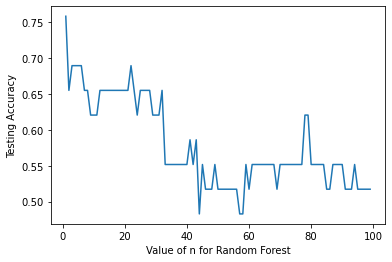

In [24]:
n_range = range(1, 100)
accuracy_scores = []

for n in n_range:
    classifier = AdaBoostClassifier(random_state=0, n_estimators=n)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, guesses))
print(accuracy_scores)

import matplotlib.pyplot as plt

plt.plot(n_range, accuracy_scores)
plt.xlabel('Value of n for Random Forest')
plt.ylabel('Testing Accuracy')
plt.show()


### Stack

[0.5172413793103449, 0.7241379310344828, 0.6206896551724138, 0.6551724137931034, 0.6896551724137931, 0.5517241379310345, 0.5862068965517241, 0.5862068965517241, 0.4827586206896552, 0.5862068965517241, 0.6206896551724138, 0.7931034482758621, 0.6206896551724138, 0.6206896551724138, 0.5862068965517241, 0.5517241379310345, 0.4482758620689655, 0.5517241379310345, 0.5172413793103449, 0.41379310344827586, 0.4827586206896552, 0.5862068965517241, 0.6206896551724138, 0.41379310344827586, 0.5172413793103449, 0.41379310344827586, 0.4482758620689655, 0.6206896551724138, 0.5517241379310345, 0.6551724137931034, 0.4827586206896552, 0.5517241379310345, 0.41379310344827586, 0.5172413793103449, 0.5172413793103449, 0.5517241379310345, 0.4827586206896552, 0.4827586206896552, 0.5862068965517241, 0.5172413793103449, 0.4482758620689655, 0.5517241379310345, 0.41379310344827586, 0.41379310344827586, 0.41379310344827586, 0.4482758620689655, 0.4482758620689655, 0.4482758620689655, 0.5172413793103449, 0.3793103448

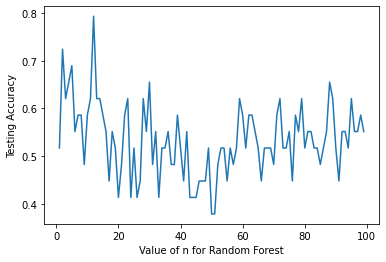

In [153]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier

n_range = range(1, 50)
accuracy_scores = []

for n in n_range:
    base_models = [
        ('rf', RandomForestClassifier(random_state=0, n_estimators=4)),
        ('ada', AdaBoostClassifier(random_state=0, n_estimators=n))
    ]
    classifier = StackingClassifier(estimators=base_models, final_estimator=DecisionTreeClassifier())
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, guesses))
print(accuracy_scores)

import matplotlib.pyplot as plt

plt.plot(n_range, accuracy_scores)
plt.xlabel('Value of n for Random Forest')
plt.ylabel('Testing Accuracy')
plt.show()

## 0.7931034482758621로 증가하였음

In [164]:
base_models = [
    ('rf', RandomForestClassifier(random_state=0, n_estimators=4)),
    ('ada', AdaBoostClassifier(random_state=0, n_estimators=12))
]

classifier = StackingClassifier(estimators=base_models, final_estimator=DecisionTreeClassifier())
classifier.fit(X_train, y_train)
guesses = classifier.predict(X_test)
accuracy_scores.append(accuracy_score(y_test, guesses))
print(accuracy_scores)

[0.7931034482758621]


[0.7241379310344828, 0.6206896551724138, 0.6206896551724138, 0.7931034482758621, 0.7931034482758621, 0.7241379310344828, 0.7241379310344828, 0.6206896551724138, 0.5517241379310345, 0.5517241379310345, 0.6551724137931034, 0.5862068965517241, 0.6551724137931034, 0.5172413793103449, 0.5517241379310345, 0.6206896551724138, 0.6206896551724138, 0.7241379310344828, 0.6551724137931034, 0.7241379310344828, 0.7931034482758621, 0.7241379310344828, 0.7586206896551724, 0.6896551724137931, 0.7586206896551724, 0.7586206896551724, 0.7241379310344828, 0.7241379310344828, 0.6896551724137931, 0.6896551724137931, 0.6551724137931034, 0.7241379310344828, 0.7586206896551724, 0.7241379310344828, 0.7241379310344828, 0.7586206896551724, 0.6896551724137931, 0.6551724137931034, 0.6551724137931034, 0.6551724137931034, 0.7241379310344828, 0.6896551724137931, 0.6206896551724138, 0.6896551724137931, 0.5517241379310345, 0.7241379310344828, 0.6896551724137931, 0.5862068965517241, 0.6896551724137931]


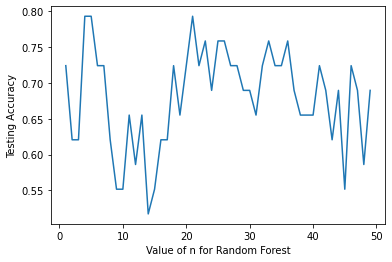

In [165]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier

n_range = range(1, 50)
accuracy_scores = []

for n in n_range:
    base_models = [
        ('rf', RandomForestClassifier(random_state=0, n_estimators=n)),
        ('ada', AdaBoostClassifier(random_state=0, n_estimators=12))
    ]
    classifier = StackingClassifier(estimators=base_models, final_estimator=DecisionTreeClassifier())
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, guesses))
print(accuracy_scores)

import matplotlib.pyplot as plt

plt.plot(n_range, accuracy_scores)
plt.xlabel('Value of n for Random Forest')
plt.ylabel('Testing Accuracy')
plt.show()

In [179]:
from sklearn.linear_model import LogisticRegression

base_models = [
    ('rf1', RandomForestClassifier(random_state=0, n_estimators=4)),
    ('rf2', RandomForestClassifier(random_state=0, n_estimators=4))
]

classifier = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression(solver='liblinear', random_state=13))
classifier.fit(X_train, y_train)
guesses = classifier.predict(X_test)

print("Confusion Matrix: ", confusion_matrix(y_test, guesses))

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, guesses))

Confusion Matrix:  [[ 5  9]
 [ 2 13]]
Accuracy: 0.6206896551724138


In [181]:
base_models = [
    ('ada1', AdaBoostClassifier(random_state=0, n_estimators=12)),
    ('ada2', AdaBoostClassifier(random_state=0, n_estimators=12))
]

classifier = StackingClassifier(estimators=base_models, final_estimator=DecisionTreeClassifier())
classifier.fit(X_train, y_train)
guesses = classifier.predict(X_test)

print("Confusion Matrix: ", confusion_matrix(y_test, guesses))

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, guesses))

Confusion Matrix:  [[ 9  5]
 [ 3 12]]
Accuracy: 0.7241379310344828


### RF, ADA + LogisticRegression

In [174]:
from sklearn.linear_model import LogisticRegression

base_models = [
    ('rf', RandomForestClassifier(random_state=0, n_estimators=4)),
    ('ada', AdaBoostClassifier(random_state=0, n_estimators=12))
]

classifier = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression(solver='liblinear', random_state=13))
classifier.fit(X_train, y_train)
guesses = classifier.predict(X_test)

print("Confusion Matrix: ", confusion_matrix(y_test, guesses))

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, guesses))

Confusion Matrix:  [[ 5  9]
 [ 2 13]]
Accuracy: 0.6206896551724138


In [183]:
base_models = [
    ('ada1', AdaBoostClassifier(random_state=0, n_estimators=12)),
    ('ada2', AdaBoostClassifier(random_state=0, n_estimators=12))
]

classifier = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())
classifier.fit(X_train, y_train)
guesses = classifier.predict(X_test)

print("Confusion Matrix: ", confusion_matrix(y_test, guesses))

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, guesses))

Confusion Matrix:  [[ 1 13]
 [ 0 15]]
Accuracy: 0.5517241379310345
